In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 22.0 MB/s 
     |████████████████████████████████| 596 kB 14.8 MB/s 
     |████████████████████████████████| 6.6 MB 10.6 MB/s 
     |████████████████████████████████| 101 kB 13.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Imports
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models
from torch.utils.data.sampler import SubsetRandomSampler
from numpy.lib.function_base import append
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from transformers import ConvNextFeatureExtractor, ConvNextForImageClassification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load
import json
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_mean = torch.load('./drive/MyDrive/MLProject/normalizer_mean.pt')
train_std = torch.load('./drive/MyDrive/MLProject/normalizer_std.pt')

FileNotFoundError: ignored

In [ ]:

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_mean, std=train_std)
])

In [ ]:
image_datasets = torchvision.datasets.ImageFolder(root= "./drive/MyDrive/MLProject/Generalization_Images", transform=test_transform)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloader = torch.utils.data.DataLoader(image_datasets, batch_size=1, shuffle=True, num_workers=2)

In [ ]:
# Device configuration
device = torch.device('cuda')
classes = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
model_type = 'FFNN_Flat'

In [ ]:
model = torch.load("Model_ConvNeXt_97")

In [ ]:
# if i % 100 == 0: ...

In [ ]:
xgen = []
ygen = []

for i, data in enumerate(test_loader):
            images, labels = data[0].to(device), data[1].to(device)
            ygen.append(labels)
            xgen.append(images)
            if i % 1000 == 0:
              print(i)


In [ ]:
def model_eval(features, labels, model, dataset):
    counter = 0
    with torch.no_grad():
        model.to(device)
        model.eval()
        predicted_classes = []
        actual_classes = []
    with torch.no_grad():
        for i, data in enumerate(features):
            inputs = torch.tensor(data).to(device)
            label = torch.tensor(labels[i]).to(device)
            output = model(inputs).logits
            prediction = output.argmax(dim=-1, keepdim=True)
            predicted_classes.append(prediction.item())
            actual_classes.append(label.item())
            if i % 100 == 0:
              print(i)

#         for i, data in enumerate(features):
#             inputs = torch.tensor(data).to(device)
#             labels = torch.tensor(labels[i]).to(device)
#             outputs = model(inputs)
#             predictions = outputs.argmax(dim=-1, keepdim=True)
#             predicted_classes.append(predictions.extend(predictions).item())
#             actual_classes.append(labels.item())

    #since labels are read in based on ordering in the folder, 
    #this corrects the labels so they reflect the correct classes
    #############################################################
    if dataset == 'gen':
        labels_dict = {
            0:3,#cat
            1:5,#dog
            2:7,#horse
            3:8#ship
        }
        for index, item in enumerate(actual_classes):
            actual_classes[index] = labels_dict[item]
    #############################################################

    performance_report = classification_report(
                        actual_classes, 
                        predicted_classes, 
                        labels=list(range(0,10)), 
                        target_names=classes, 
                        output_dict=True
                        )

    with open(f'performance_report_{dataset}.json', 'w') as f:
        json.dump(performance_report, f, indent=0)

    overall_accuracy = accuracy_score(actual_classes, predicted_classes)

    comparison_list = [['Actual', 'Predicted']]

    for i in range(0,len(actual_classes)):
        comparison_list.append([actual_classes[i], predicted_classes[i]])
    np.savetxt(f'class_pred_{dataset}.csv', comparison_list, delimiter=',', fmt='%s')

    labeled_actual = []
    labeled_predicted = []
    for index, item in enumerate(actual_classes):
        labeled_actual.append(classes[actual_classes[index]])
        labeled_predicted.append(classes[predicted_classes[index]])

    plt.clf()
    c_matrix = confusion_matrix(labeled_actual, labeled_predicted)
    c_df = pd.DataFrame(c_matrix, index=classes, columns=classes)
    plt.figure(figsize=(13,13))
    sns.heatmap(c_df, annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'labeled_confusion_matrix_{dataset}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return overall_accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

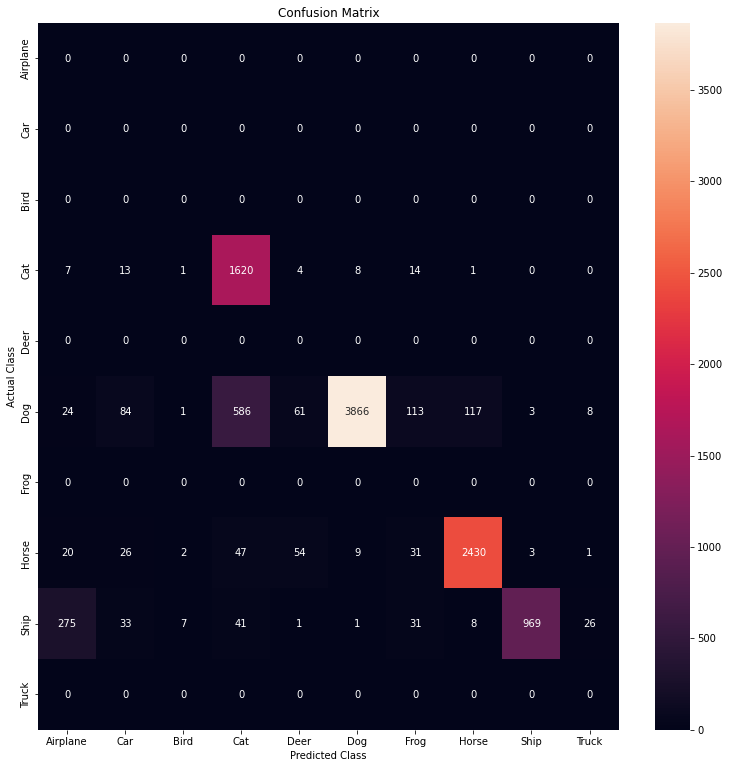

In [ ]:
gen_acc = model_eval(xgen, ygen, model, 'gen')

In [ ]:
gen_acc

0.842499525886592